# 파이썬으로 데이터 분포 살펴보기

## 분포

데이터의 수가 적으면 데이터의 값을 하나 하나 살펴볼 수 있지만 데이터의 수가 많다면 데이터가 주로 어떤 값 근처에 어떤 모양으로 모여 있는지 전반적인 형태를 살펴보는 수밖에 없다. 데이터 값의 전반적인 형태를 데이터의 **분포(distribution)**라고 한다.

주로 다음과 같은 방법으로 일차원 데이터의 분포를 살펴본다.

* 기술 통계 (descriptive statistics) 
* 히스토그램 (histogram)
* 커널 밀도 (kernel density)

## 기술 통계

기술 통계(descriptive statistics)는 데이터 분포의 특징을 대표할 수 있는 몇가지 숫자를 계산하여 이 숫자들로부터 데이터의 분포를 추측하는 방법이다. 흔히 일반인들이 통계라고 부르는 것이 바로 기술 통계를 말한다.

데이터의 분포의 특징을 대표하는 값들로는 

* 데이터의 숫자 (count)
* 평균 (mean, average)
* 분산 (variance)
* 표준 편차 (standard deviation)
* 최댓값 (maximum)
* 최솟값 (minimum)
* 중앙값 (median)
* 사분위수 (quartile)

등이 많이 사용된다.

데이터가 $x_1, x_2, \cdots, x_N$ 일때, 평균은 보통 $\bar{x}$라고 표시하며 다음과 같이 계산된다.
$$ \bar{x} = \dfrac{1}{N}\sum_{i=1}^N x_i $$

분산은 보통 $s^2$이라고 표시하며 계산된 평균 $\bar{x}$를 이용하여 다음과 같이 계산된다.
$$ s^2 = \dfrac{1}{N}\sum_{i=1}^N (x_i - \bar{x})^2 $$

표준 편차는 보통 $s$이라고 표시하며 분산의 제곱근 값이다.
$$ s = \sqrt{s^2} $$

최댓값은 데이터 중에서 가장 큰 값을, 최솟값을 가장 작은 값을 의미한다. 

중앙값은 데이터를 크기대로 정렬하였을 때 가장 가운데에 있는 수를 말한다. 만약 데이터의 수가 짝수이면 보통 중앙의 두 수의 평균을 사용한다.

사분위수(quartile)는 데이터를 크기대로 정렬하였을 때 1/4, 2/4, 3/4 위치에 있는 수를 말한다. 1/4의 위치란 전체 데이터의 수가 만약 100개이면 25번째 순서를 말한다. 따라서 2사분위수는 중앙값과 같다.

때로는 위치를 1/100 단위로 나눈 백분위수(percentile)을 사용하기도 한다. 1사분위수는 25% 백분위수와 같다.

예를 들어 다음과 같은 데이터가 있다.

In [34]:
x = np.array([ 18,   5,  10,  23,  19,  -8,  10,   0,   0,   5,   2,  15,   8,
                2,   5,   4,  15,  -1,   4,  -7, -24,   7,   9,  -6,  23, -13,
                1,   0,  16,  15,   2,   4,  -7, -18,  -2,   2,  13,  13,  -2,
               -2,  -9, -13, -16,  20,  -4,  -3, -11,   8, -15,  -1,  -7,   4,
               -4, -10,   0,   5,   1,   4,  -5,  -2,  -5,  -2,  -7, -16,   2,
               -3, -15,   5,  -8,   1,   8,   2,  12, -11,   5,  -5,  -7,  -4])

이 데이터의 기술 통계값을 구하는 명령어는 다음과 같다.

In [35]:
len(x)

78

In [36]:
np.mean(x)

0.69230769230769229

In [37]:
np.var(x)

96.059171597633139

In [38]:
np.std(x)

9.8009780939268065

In [39]:
np.max(x)

23

In [40]:
np.min(x)

-24

In [41]:
np.median(x)

0.5

In [42]:
np.percentile(x, 25)

-5.75

In [43]:
np.percentile(x, 50)

0.5

In [44]:
np.percentile(x, 75)

5.0

파이썬은 기술 통계값을 한번에 계산하는 명령도 제공한다.

* [scipy.stats의 `describe` 함수](http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.describe.html)
* [pandas Series/DataFrame의 describe 메소드](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.describe.html)

In [45]:
sp.stats.describe(x)

DescribeResult(nobs=78, minmax=(-24, 23), mean=0.69230769230769229, variance=97.306693306693305, skewness=0.11586487731702556, kurtosis=-0.15461828136911615)

In [46]:
s = pd.Series(x)
s.describe()

count    78.000000
mean      0.692308
std       9.864416
min     -24.000000
25%      -5.750000
50%       0.500000
75%       5.000000
max      23.000000
dtype: float64

## 히스토그램

히스토그램은 자료 값이 가질 수 있는 범위를 몇 개의 구간으로 나누고 각 구간에 해당하는 값의 숫자 혹은 상대적 빈도를 계산하는 방법이다.

파이썬에서 히스토그램을 구하거나 그리기 위해서는 다음과 같은 명령을 사용한다.

* [matplotlib의 `hist`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist)
* [seaborn의 `distplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html)

matplotlib의 hist 함수는 다음과 같은 3개의 값을 반환한다.

* n : 각 구간에 있는 값의 수 혹은 빈도 리스트
* bins : 구간의 경계값 리스트 
* patches : 각 구간을 그리는 matplotlib patch 객체 리스트

위의 자료에 대해 히스토그램을 그리면 아래와 같다.

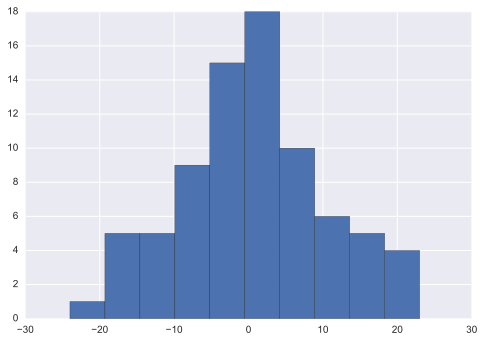

In [47]:
n, bins, patches = plt.hist(x, bins=10)
plt.show()

In [48]:
n

array([  1.,   5.,   5.,   9.,  15.,  18.,  10.,   6.,   5.,   4.])

In [49]:
bins

array([-24. , -19.3, -14.6,  -9.9,  -5.2,  -0.5,   4.2,   8.9,  13.6,
        18.3,  23. ])

In [50]:
patches

<a list of 10 Patch objects>

seaborn의 `displot`명령은 히스토그램에 대한 axis 객체만을 반환하는 대신 러그(rug), 커널 밀도(kernel density) 등을 표시하거나 특정한 확률 모형으로 fitting하는 추가 기능이 있다.

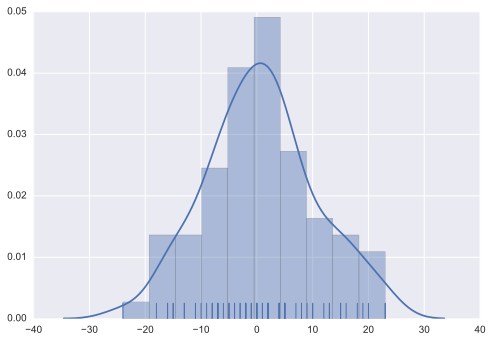

In [51]:
sns.distplot(x, rug=True)
plt.show()

## 커널 밀도

앞의 그림에서 곡선으로 나타난 것이 커널 밀도이다.  커널 밀도는 커널이라고 하는 특정 구간의 분포를 묘사하는 함수의 집합을 사용하여 전체 분포를 묘사하는 방법이다. 커널 밀도를 사용하면 분포의 전체 모양을 파악하기가 더 쉽다.

커널 밀도에 관한 자세한 내용은 scikit-learn 패키지의 사용자 가이드와 예제를 참조하면 된다.

* http://scikit-learn.org/stable/modules/density.html#kernel-density-estimation

## 다차원 데이터 분포를 묘사하는 경우

다차원 데이터 분포는 순서가 정해진 여러개의 일차원 데이터가 있는 것과 같다.

만약 2차원 데이터이고 각 데이터가 모두 연속적인 실수값이라면 스캐터 플롯(scatter plot)을 사용하면 된다. 스캐터 플롯을 그리기 위해서는 seaborn 패키지의 `joinplot` 명령을 사용한다. `joinplot` 명령은 스캐터 플롯뿐 아니라 각 변수의 히스토그램도 동시에 그린다.

* [seaborn 패키지의 joinplot 함수](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html#seaborn.jointplot)



다음 데이터는 붓꽃의 꽃잎의 길이, 꽃잎의 폭, 꽃받침의 길이, 꽃받침의 폭, 그리고 종(species)을 나타낸 데이터이다.

In [69]:
iris = sns.load_dataset("iris")
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


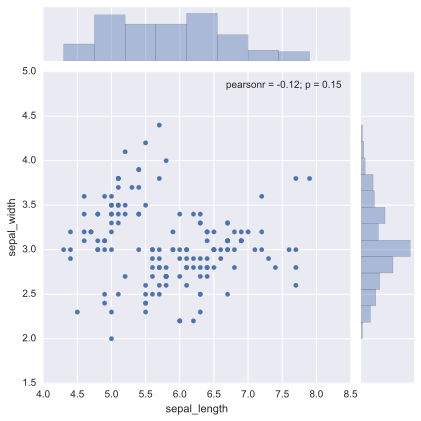

In [70]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.show()

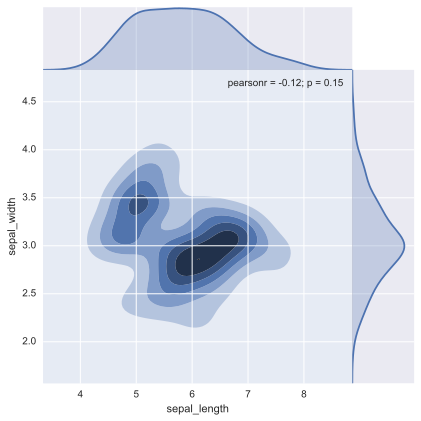

In [71]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde", space=0, zorder=0, n_levels=6)
plt.show()

만약 3차원 이상의 데이터라면 seaborn 패키지의 `pairplot` 명령을 사용한다. `pairplot`은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 스캐터 플롯을 그린다.

* [seaborn 패키지의 pairplot 함수](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

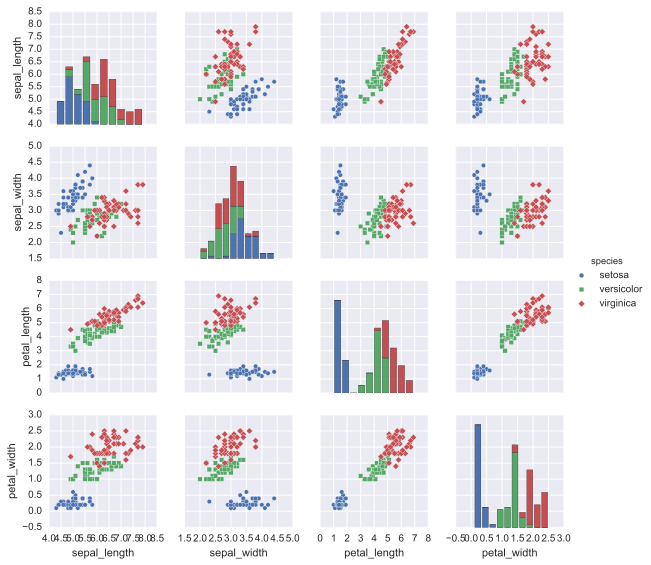

In [66]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"], size=2)
plt.show()

만약 모든 값이 카테고리(category) 값이면  seaborn 패키지의 `heatmap`을 사용하면 된다.

* [seaborn 패키지의 `heatmap` 함수](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html)

다음 데이터는 년, 월별 항공 탑승객의 수를 나타낸 것이다.

In [72]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
flights.tail()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508
October,119,133,162,191,211,229,274,306,347,359,407,461
November,104,114,146,172,180,203,237,271,305,310,362,390
December,118,140,166,194,201,229,278,306,336,337,405,432


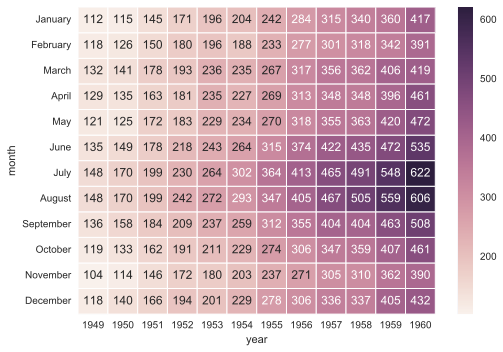

In [59]:
sns.heatmap(flights, annot=True, fmt="d", linewidths=1)
plt.show()

두 자료 집합 중 하나는 연속적인 값이고 다른 하나는 이산적인 혹은 카테고리 값인 경우에는 seaborn에서 제공하는 다음과 같은 플롯을 사용할 수 있다.

* [`boxplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html)
* [`violinplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html)
* [`stripplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.stripplot.html)
* [`swarmplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.swarmplot.html)
* [`pointplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pointplot.html)
* [`factorplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html)


다음 자료는 타이타닉호의 승객 명단이다.

In [74]:
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


승객의 나이(age) 분포를 성(sex), 선실(class), 기항지(embark_town)에 따라 분류하여 표시하면 다음과 같다.

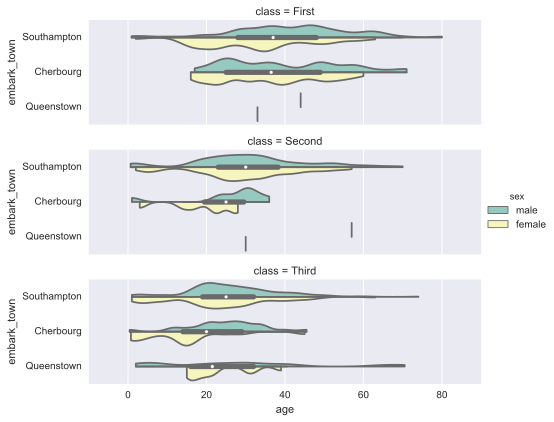

In [73]:
sns.factorplot(x="age", y="embark_town", hue="sex", row="class", data=titanic[titanic.embark_town.notnull()],
               orient="h", size=2, aspect=3.5, palette="Set3", kind="violin", split=True, cut=0, bw=.2)
plt.show()